In [42]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./tmp/data/", one_hot=True)

Extracting ./tmp/data/train-images-idx3-ubyte.gz
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz


In [44]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [38]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    #layer_1 样例数*256
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    #layer_2 样例数*128
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    #layer_1 样例数*256
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    #layer_2 样例数*784
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

(?, 784)


In [22]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.457951
Step 1000: Minibatch Loss: 0.140696
Step 2000: Minibatch Loss: 0.124135
Step 3000: Minibatch Loss: 0.116704
Step 4000: Minibatch Loss: 0.113515
Step 5000: Minibatch Loss: 0.101101
Step 6000: Minibatch Loss: 0.093263
Step 7000: Minibatch Loss: 0.091405
Step 8000: Minibatch Loss: 0.085519
Step 9000: Minibatch Loss: 0.084394
Step 10000: Minibatch Loss: 0.082356
Step 11000: Minibatch Loss: 0.079125
Step 12000: Minibatch Loss: 0.076935
Step 13000: Minibatch Loss: 0.071009
Step 14000: Minibatch Loss: 0.070306
Step 15000: Minibatch Loss: 0.069102
Step 16000: Minibatch Loss: 0.070535
Step 17000: Minibatch Loss: 0.070190
Step 18000: Minibatch Loss: 0.068899
Step 19000: Minibatch Loss: 0.067492
Step 20000: Minibatch Loss: 0.068227
Step 21000: Minibatch Loss: 0.066402
Step 22000: Minibatch Loss: 0.065645
Step 23000: Minibatch Loss: 0.065092
Step 24000: Minibatch Loss: 0.064120
Step 25000: Minibatch Loss: 0.063263
Step 26000: Minibatch Loss: 0.061188
Step 27000: Mi

Original Images


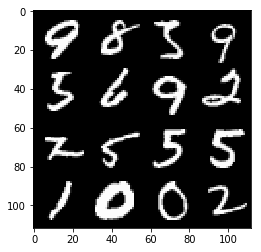

Reconstructed Images


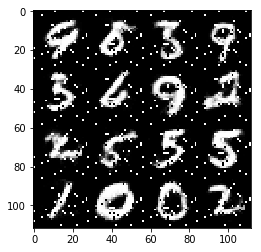

In [26]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [50]:
v1 = tf.Variable(tf.random_normal([2, 2]))
v2 = tf.Variable(tf.random_normal([2, 2]))
v3 = v1 + v2
v4 = tf.pow(v3,2);
v5 = tf.reduce_mean(v4)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

print(sess.run(v1))
print(sess.run(v2))
print(sess.run(v3))
print(sess.run(v4))
print(sess.run(v5))

[[-0.7116695   1.98945642]
 [-1.46648335  1.2936033 ]]
[[ 1.14106679  2.20149541]
 [-0.2582556  -0.37146875]]
[[ 0.42939728  4.19095182]
 [-1.72473896  0.92213452]]
[[  0.18438202  17.56407738]
 [  2.97472453   0.85033208]]
5.39338
